# Data Mining Final Project

## Pokemon Legendary Predictions

##### The goal of this project is based on the current list of legendary Pokemon's and their statistics, can we predict other Pokemon's that are legendary as well?

In [1]:
#Importing all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
df.generation.unique()

array([1, 2, 3, 4, 5, 6, 7])

In [4]:
Ivysaur = df[df['name']=='Ivysaur']

In [5]:
pd.DataFrame.transpose(Ivysaur)


,1
abilities,"['Overgrow', 'Chlorophyll']"
against_bug,1.0
against_dark,1.0
against_dragon,1.0
against_electric,0.5
against_fairy,0.5
against_fight,0.5
against_fire,2.0
against_flying,2.0
against_ghost,1.0


In [6]:
total_miss = df.isnull().sum().sort_values(ascending=False)
miss = round(df.isnull().sum()/df.isnull().count()*100,1).sort_values(ascending=False)
missing_data = pd.concat([total_miss, miss], axis=1, keys=['Missing data', '%'])
missing_data = missing_data[missing_data['Missing data']>0]
missing_data

,Missing data,%
type2,384,47.9
percentage_male,98,12.2
weight_kg,20,2.5
height_m,20,2.5


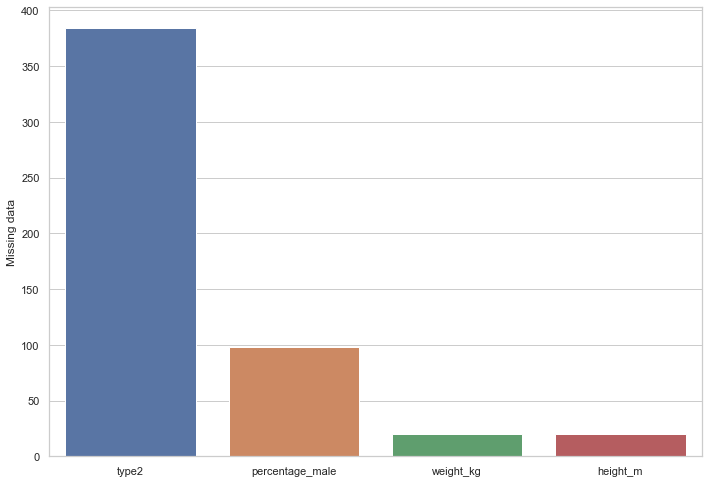

In [7]:
missing_data = missing_data[missing_data['Missing data']>0]

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=missing_data.index, y="Missing data", data=missing_data)


In [8]:
df.shape

(801, 41)

In [9]:
df['percentage_male'].unique()

array([ 88.1,  50. ,   0. , 100. ,  24.6,  75.4,   nan,  11.2])

In [10]:
df1 =df[['percentage_male','is_legendary']]

In [11]:
is_legendary = df1[df1['is_legendary'] ==1]
not_legendary = df1[df1['is_legendary'] ==0]
gen = is_legendary.groupby([is_legendary['percentage_male']]).count()
gen1 = not_legendary.groupby([not_legendary['percentage_male']]).count()
gen = pd.DataFrame({'percentage_male': [0.0, 11.2, 24.6, 50.0, 75.4, 88.1, 100.0], 
    'is_legendary': [2, 0, 0, 1, 0, 0, 4],
    'not_legendary': [25, 2, 24, 500, 19, 111, 15]})

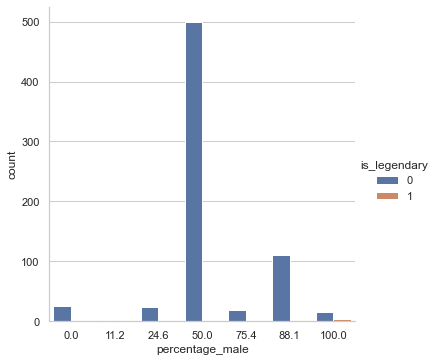

In [13]:
sns.catplot(data=df,kind='count',x='percentage_male',hue='is_legendary')


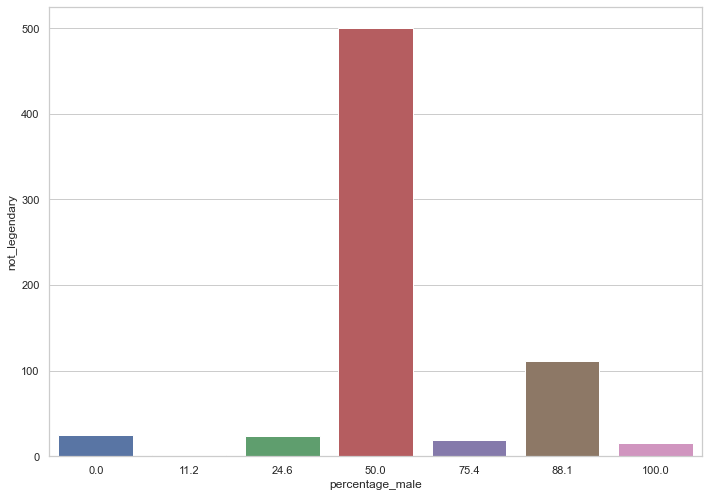

In [14]:
ax = sns.barplot(x=gen.percentage_male, y="not_legendary", data=gen)


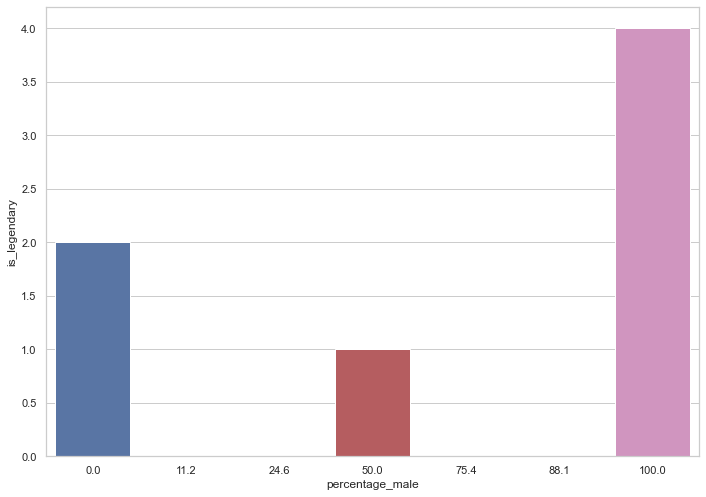

In [15]:
ax = sns.barplot(x=gen.percentage_male, y="is_legendary", data=gen)


In [16]:
gen1.index

Float64Index([0.0, 11.2, 24.6, 50.0, 75.4, 88.1, 100.0], dtype='float64', name='percentage_male')

/Users/jiangtao/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


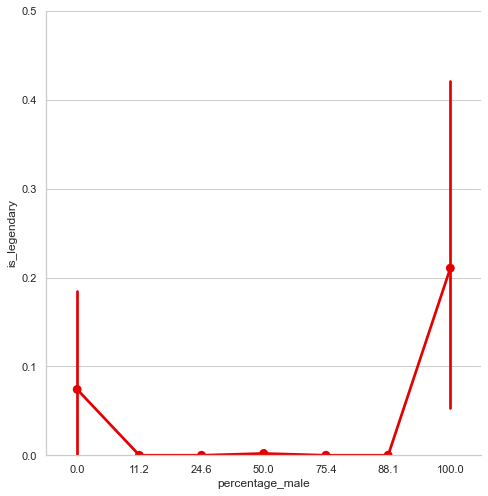

In [8]:
import seaborn as sns
sns.set(style="whitegrid")
g = sns.PairGrid(data = df, x_vars='percentage_male', y_vars = 'is_legendary', size=7)
g.map(sns.pointplot, color=sns.xkcd_rgb['red'])
g.set(ylim=(0, 0.5))

In [9]:
#Columns Dropping
#Abilities
#Classification
#Japanese_Name
#Percentage_Male
#Pokedex
#Generation

In [10]:
df = df.drop(columns=['abilities', 'classfication','japanese_name', 'percentage_male', 'pokedex_number', 'generation'])

In [11]:
#Changing Capture Rate to Percentage

In [12]:
#Changing all missing values
#Type 2 null values to 'none'
#Weight null values to 0
#Heigh null values to 0


In [13]:
df['type2'] = df['type2'].fillna('none')
df['weight_kg'] = df['weight_kg'].fillna(0)
df['height_m'] = df['height_m'].fillna(0)

In [14]:
# Abnormal entry in capture_rate column
df['capture_rate'].unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)'], dtype=object)

In [15]:
df.loc[df['capture_rate'] == '30 (Meteorite)255 (Core)']

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,name,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary
773,0.5,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0,0.5,0.5,1.0,2.0,2.0,2.0,100,6400,70,500,30 (Meteorite)255 (Core),60,1059860,0.3,60,Minior,100,60,120,rock,flying,40.0,0


In [16]:
df['capture_rate'] = df['capture_rate'].replace(['30 (Meteorite)255 (Core)'],30)

In [17]:
df['capture_rate'] = df['capture_rate'].astype(int)

In [18]:
df['capture_rate'] = df['capture_rate']/100

In [19]:
df['capture_rate']

0      0.45
1      0.45
2      0.45
3      0.45
4      0.45
       ... 
796    0.25
797    2.55
798    0.15
799    0.03
800    0.03
Name: capture_rate, Length: 801, dtype: float64

In [ ]:
# Check before Export

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

In [21]:
df.isnull().sum()

against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
defense              0
experience_growth    0
height_m             0
hp                   0
name                 0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
is_legendary         0
dtype: int64

In [22]:
# Export

In [25]:
df.to_csv('Pokemon_cleaned.csv')